In [77]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font', family=fontprop)

path1 = '/home/piai/빅데이터/1. Big Data 분석 기초/'
path2 = '/home/piai/빅데이터/2. Big Data 분석/'

## BMI 컬럼 추가

In [55]:
df_raw = pd.read_csv(path2+'체질검사.csv')
df_raw['BMI'] = (df_raw['WEIGHT']*0.45) / ((df_raw['HEIGHT']*0.0254)**2)
df_raw.head()

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0  35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1  11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2  22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   
3  10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   21.3   
4  47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   23.6   

   BICEPS  FOREARM  WRIST        BMI  
0    45.0     29.0   21.4  48.523870  
1    29.0     30.0   18.8  23.082595  
2    30.8     25.7   18.8  26.422478  
3    31.7     27.3   16.9  23.838617  
4    34.7     29.1   18.4  37.293165

## 이상치 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcbc37c65b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbc37c6b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcbc37c62e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcbc3750130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbc3750400>,
 'means': []}

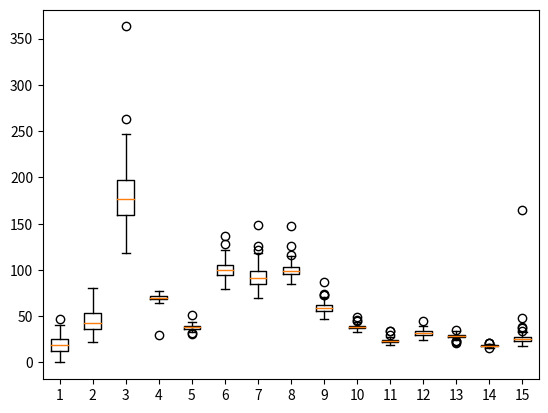

In [112]:
plt.boxplot(df_raw)

## BMI 값이 150 이상 삭제

In [125]:
df_raw.drop(df_raw[df_raw['BMI'] > 150].index, axis=0, inplace=True)

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  \
0    35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   
1    11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   
2    22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   
3    10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   
4    47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   
..    ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247  31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   
248  23.6   43  170.75   67.50  37.4  103.7     89.7   94.2   58.5  39.0   
249  20.9   35  162.75   66.00  36.4   99.1     92.8   99.2   63.1  38.7   
250  17.0   56  167.75   68.50  37.4   98.6     93.0   97.0   55.4  38.8   
251  17.7   42  168.00   71.50  36.5   92.0     89.7  101.0   62.3  38.0   

     ANKLE  BICEPS  FOREARM  WRIST        BMI  
0     29.6    45.0     29.0   21.4  48.523870  
1     24.5    29.0     30.0   18.8  23.082595  
2     21.8    30.8     25.7   18.8  26.422478  
3     21.3    31.7     27.3   16.9  23.838617  
4     23.6    34.7     29.1   18.4  37.293165  
..     ...     ...      ...    ...        ...  
247   24.6    33.7     30.0   20.9  29.537049  
248   24.1    33.8     28.8   18.8  26.139558  
249   21.7    31.1     26.4   16.9  26.060228  
250   23.2    32.4     29.7   19.0  24.935981  
251   22.3    30.8     27.8   16.9  22.921460  

[252 rows x 15 columns]

## 목표 변수 FAT와 선형관계가 있는 설명변수 WEIGHT, CHEST, ABDOMEN
## 설명 변수 간 선형관계가 있는 변수 ABDOMEN, THIGH, KNEE 등이 있다.
## 다중공선성을 해결해야 한다.

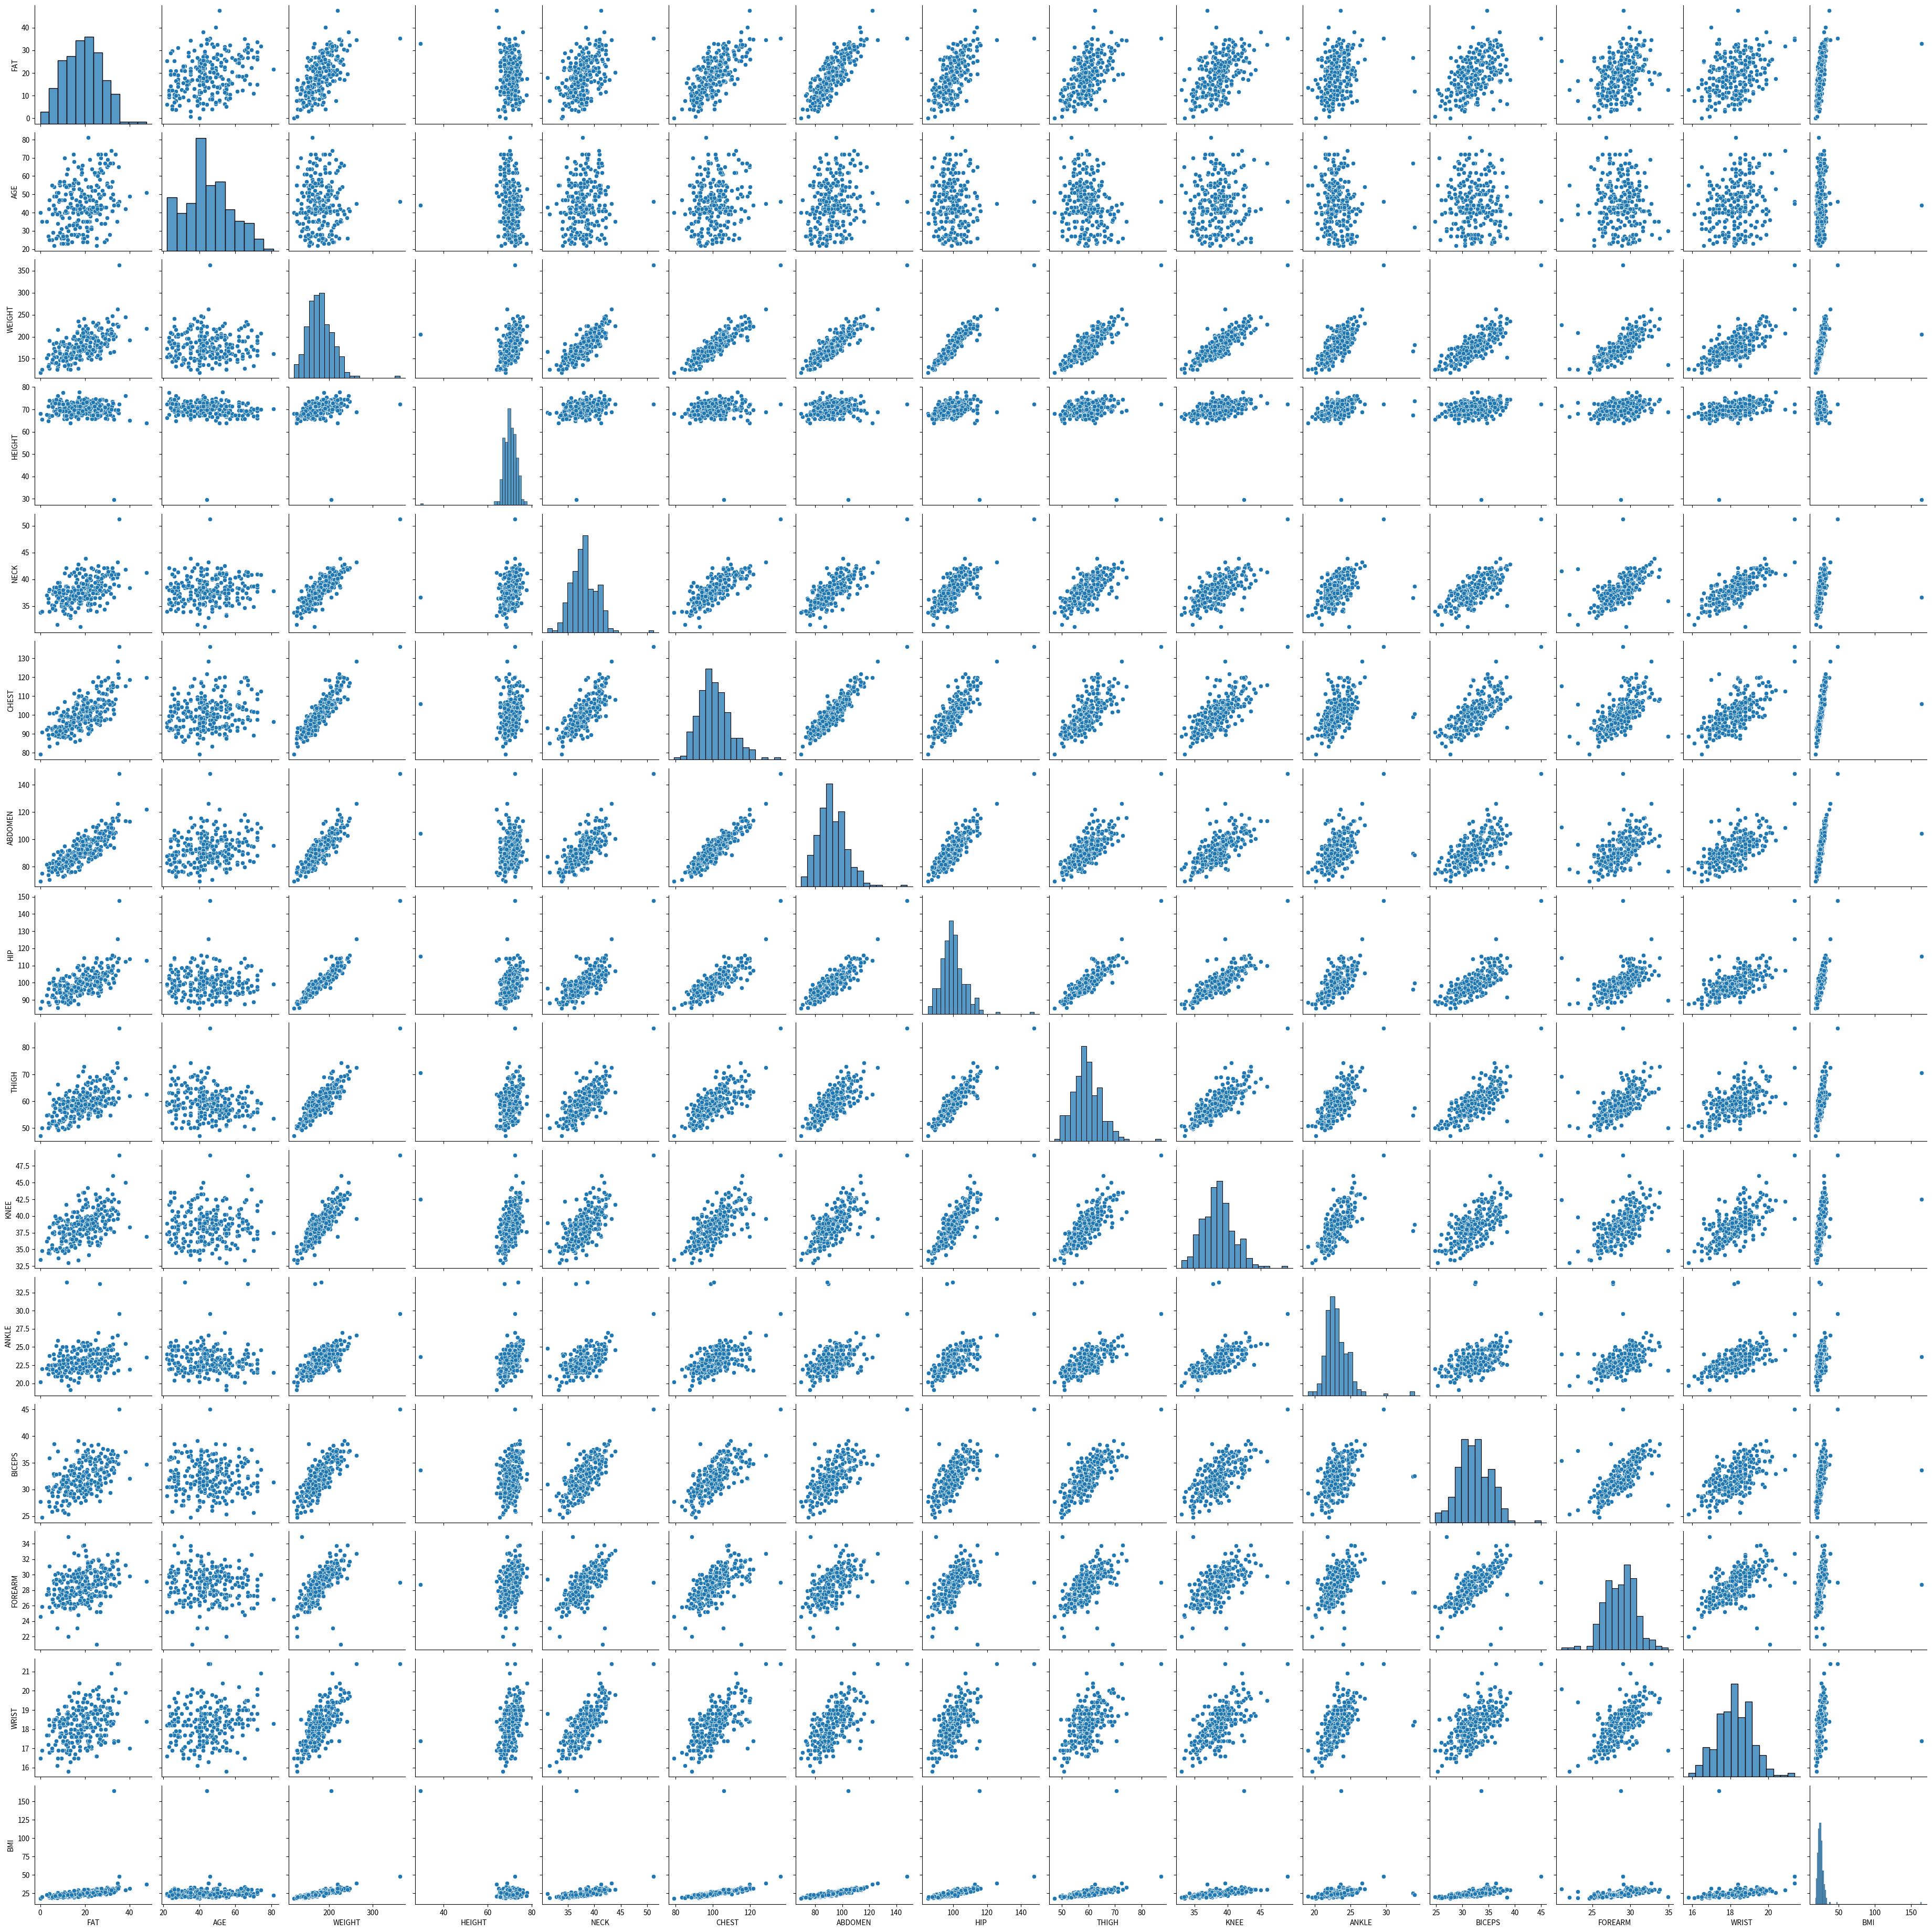

In [126]:
sns.pairplot(df_raw)

In [127]:
df_raw.corr().round(3)

FAT    AGE  WEIGHT  HEIGHT   NECK  CHEST  ABDOMEN    HIP  THIGH  \
FAT      1.000  0.291   0.612  -0.089  0.491  0.703    0.813  0.625  0.560   
AGE      0.291  1.000  -0.013  -0.172  0.114  0.176    0.230 -0.050 -0.200   
WEIGHT   0.612 -0.013   1.000   0.308  0.831  0.894    0.888  0.941  0.869   
HEIGHT  -0.089 -0.172   0.308   1.000  0.254  0.135    0.088  0.170  0.148   
NECK     0.491  0.114   0.831   0.254  1.000  0.785    0.754  0.735  0.696   
CHEST    0.703  0.176   0.894   0.135  0.785  1.000    0.916  0.829  0.730   
ABDOMEN  0.813  0.230   0.888   0.088  0.754  0.916    1.000  0.874  0.767   
HIP      0.625 -0.050   0.941   0.170  0.735  0.829    0.874  1.000  0.896   
THIGH    0.560 -0.200   0.869   0.148  0.696  0.730    0.767  0.896  1.000   
KNEE     0.509  0.018   0.853   0.286  0.672  0.719    0.737  0.823  0.799   
ANKLE    0.266 -0.105   0.614   0.265  0.478  0.483    0.453  0.558  0.540   
BICEPS   0.493 -0.041   0.800   0.208  0.731  0.728    0.685  0.739  0.761   
FOREARM  0.361 -0.085   0.630   0.229  0.624  0.580    0.503  0.545  0.567   
WRIST    0.347  0.214   0.730   0.322  0.745  0.660    0.620  0.630  0.559   
BMI      0.371  0.040   0.391  -0.638  0.266  0.383    0.415  0.462  0.433   

          KNEE  ANKLE  BICEPS  FOREARM  WRIST    BMI  
FAT      0.509  0.266   0.493    0.361  0.347  0.371  
AGE      0.018 -0.105  -0.041   -0.085  0.214  0.040  
WEIGHT   0.853  0.614   0.800    0.630  0.730  0.391  
HEIGHT   0.286  0.265   0.208    0.229  0.322 -0.638  
NECK     0.672  0.478   0.731    0.624  0.745  0.266  
CHEST    0.719  0.483   0.728    0.580  0.660  0.383  
ABDOMEN  0.737  0.453   0.685    0.503  0.620  0.415  
HIP      0.823  0.558   0.739    0.545  0.630  0.462  
THIGH    0.799  0.540   0.761    0.567  0.559  0.433  
KNEE     1.000  0.612   0.679    0.556  0.665  0.364  
ANKLE    0.612  1.000   0.485    0.419  0.566  0.210  
BICEPS   0.679  0.485   1.000    0.678  0.632  0.311  
FOREARM  0.556  0.419   0.678    1.000  0.586  0.215  
WRIST    0.665  0.566   0.632    0.586  1.000  0.190  
BMI      0.364  0.210   0.311    0.215  0.190  1.000

## Train Data를 6 Test Data를 4의 비율로 나눔

In [84]:
df_train, df_test = train_test_split(df_raw, test_size = 0.4, random_state = 1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (151, 15)
test data size : (101, 15)


## 회귀모델 생성

In [86]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT +NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     31.77
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.19e-36
Time:                        19:30:09   Log-Likelihood:                -424.76
No. Observations:                 151   AIC:                             879.5
Df Residuals:                     136   BIC:                             924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.7190     31.607     -1.636      0.1

## 분석 자료수 :151

## 분산 분석 (a = 0.05)
#### 귀무가설 : 독립변수의 모든 회귀계수가 0이다. 
#### 대립가설 : 하나 이상의 독립변수의 회귀계수가 0이 아니다.

## Omnibus 검정 (a = 0.05)
#### 귀무가설 : 확률분포는 정규분포를 따른다.
#### 대립가설 : 확률분포는 정규분포를 따르지 않는다.

## Durbin-Watson 검정 
#### 귀무가설 : 잔차항은 서로 독립이다.
#### 대립가설 : 잔차항은 서로 독립이 아니다.

## 분산분석 검정 결과 0.00으로 귀무가설 기각, 회귀모델로서 유의하다.
## Omnibus 검정 결과 0.110 귀무가설 채택, 확률분포는 정규분포를 따른다.
## Durbin-Watson 검정 결과 2에 가까우므로 귀무가설 채택 잔차항은 서로 독립이다.



#### VIF 10 이상인 다중공선성 해결 

In [87]:
df_train_x = df_train.drop(['FAT'], axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) 
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

variable      VIF
12  FOREARM     1.91
10    ANKLE     2.22
1       AGE     2.37
11   BICEPS     3.38
13    WRIST     3.45
4      NECK     4.59
9      KNEE     5.32
8     THIGH     9.26
14      BMI    10.30
5     CHEST    11.51
3    HEIGHT    12.07
6   ABDOMEN    15.41
7       HIP    16.17
2    WEIGHT    56.45
0     const  8361.56

#### WEIGHT 독립변수 제거

In [88]:
df_train_x = df_train.drop(['FAT','WEIGHT'], axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) 
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
11  FOREARM    1.91
9     ANKLE    2.03
1       AGE    2.34
10   BICEPS    3.20
12    WRIST    3.43
3      NECK    3.90
8      KNEE    5.20
2    HEIGHT    6.76
13      BMI    6.79
7     THIGH    9.09
4     CHEST    9.42
6       HIP   12.65
5   ABDOMEN   13.92
0     const  983.75

#### ABDOMEN 독립변수 제거

In [89]:
df_train_x = df_train.drop(['FAT','WEIGHT', 'ABDOMEN'], axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) 
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
10  FOREARM    1.91
1       AGE    1.91
8     ANKLE    2.01
9    BICEPS    3.14
11    WRIST    3.42
3      NECK    3.87
4     CHEST    5.18
7      KNEE    5.20
2    HEIGHT    6.45
12      BMI    6.49
6     THIGH    8.85
5       HIP   10.05
0     const  923.11

#### HIP 독립변수 제거

In [90]:
df_train_x = df_train.drop(['FAT','WEIGHT', 'ABDOMEN', 'HIP'], axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) 
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
9   FOREARM    1.84
1       AGE    1.91
7     ANKLE    1.97
8    BICEPS    3.13
10    WRIST    3.42
4     CHEST    3.75
3      NECK    3.87
6      KNEE    5.15
5     THIGH    5.94
11      BMI    6.26
2    HEIGHT    6.34
0     const  923.10

## 회귀계수 검정 (a = 0.05)
#### 귀무가설: 회귀계수는 0이다.
#### 대립가설: 회귀계수는 0이 아니다.

In [91]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     26.14
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.12e-28
Time:                        19:30:23   Log-Likelihood:                -449.71
No. Observations:                 151   AIC:                             923.4
Df Residuals:                     139   BIC:                             959.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.4413     12.254     -1.260      0.2

#### ANKLE p-value 0.975로 귀무가설 채택 => B = 0
#### ANKLE 변수 제거

In [92]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + THIGH + KNEE + BICEPS + FOREARM + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     28.96
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.01e-29
Time:                        19:30:29   Log-Likelihood:                -449.71
No. Observations:                 151   AIC:                             921.4
Df Residuals:                     140   BIC:                             954.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.4372     12.210     -1.264      0.2

#### KNEE p-value 0.745로 귀무가설 채택 => B = 0
#### KNEE 변수 제거

In [94]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + THIGH + BICEPS + FOREARM + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     32.37
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.61e-30
Time:                        19:30:33   Log-Likelihood:                -449.76
No. Observations:                 151   AIC:                             919.5
Df Residuals:                     141   BIC:                             949.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.8264     12.027     -1.233      0.2

#### BICEPS p-value 0.509로 귀무가설 채택 => B = 0
#### BICEPS 변수 제거

In [95]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + THIGH + FOREARM + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     36.50
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           7.13e-31
Time:                        19:30:36   Log-Likelihood:                -450.00
No. Observations:                 151   AIC:                             918.0
Df Residuals:                     142   BIC:                             945.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7684     11.897     -1.157      0.2

#### FOREARM p-value 0.199로 귀무가설 채택 => B = 0
#### FOREARM 변수 제거

In [96]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + THIGH + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     41.29
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.39e-31
Time:                        19:30:37   Log-Likelihood:                -450.88
No. Observations:                 151   AIC:                             917.8
Df Residuals:                     143   BIC:                             941.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3082     11.770     -0.961      0.3

#### NECK p-value 0.107로 귀무가설 채택 => B = 0
#### NECK 변수 제거

In [97]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + CHEST + THIGH + WRIST + BMI", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     47.20
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.19e-31
Time:                        19:30:40   Log-Likelihood:                -452.25
No. Observations:                 151   AIC:                             918.5
Df Residuals:                     144   BIC:                             939.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3014     11.836     -0.955      0.3

#### BMI p-value 0.057로 귀무가설 채택 => B = 0
#### BMI 변수 제거

In [98]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + CHEST + THIGH + WRIST", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     54.90
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.11e-32
Time:                        19:30:41   Log-Likelihood:                -454.15
No. Observations:                 151   AIC:                             920.3
Df Residuals:                     145   BIC:                             938.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.6420      9.254     -2.771      0.0

## 잔차의 등분산성 확인

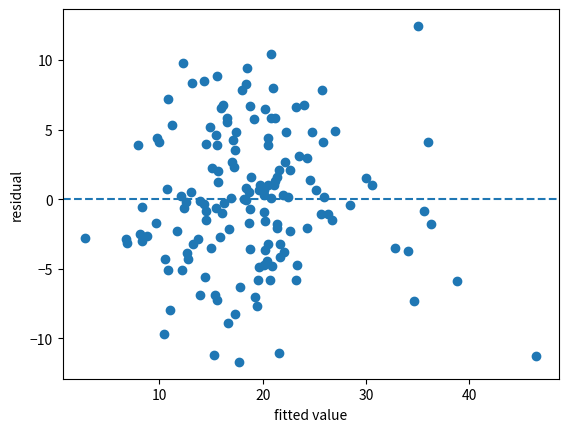

In [99]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = '--')

## 잔차의 정규성 확인

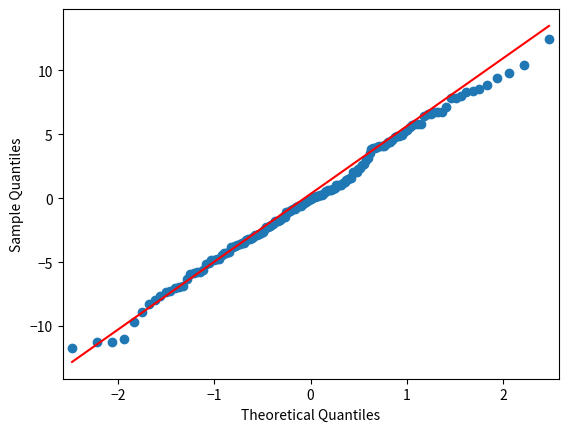

In [100]:
qqplot(reg_result.resid, line = 'q')
plt.show()

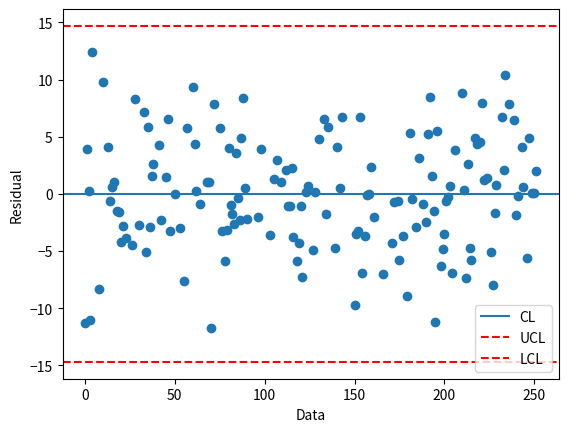

In [101]:
plt.scatter(df_train.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--", color="red", label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed", color="red", label="LCL")
plt.legend()
plt.show()

#### 회귀모델은 다소 과대 적합 됐다.

In [102]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print('train data의 결정계수:', r2_score(df_train['FAT'], train_pred))
print('test data의 결정계수:', r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.6543299595412935
test data의 결정계수: 0.5164143924682749


## 설명변수 중요도
#### WRIST, HEIGHT는 작을수록, THIGH,CHEST,AGE는 클수록 FAT이 커진다.

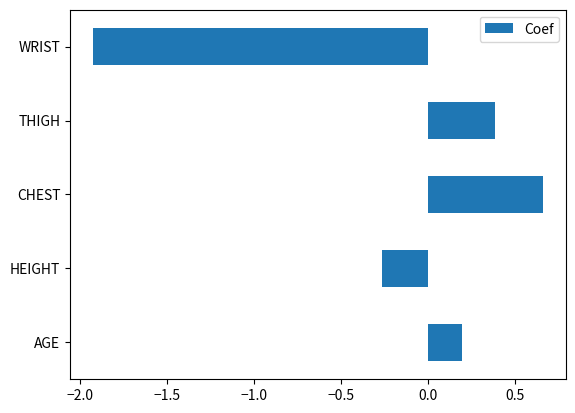

In [103]:
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                           index = ['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'WRIST'])
df_reg_coef.plot.barh(y="Coef")
plt.show()

#### y = -25.642 + 0.1953AGE + (-0.2674HEIGHT) + 0.6628CHEST + 0.3835THIGH + (-1.9304WRIST)
#### 이 회귀식의  독립변수가 종속변수를 결정계수는 0.642만큼 설명한다.

In [129]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + CHEST + THIGH + WRIST", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     54.90
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.11e-32
Time:                        20:29:20   Log-Likelihood:                -454.15
No. Observations:                 151   AIC:                             920.3
Df Residuals:                     145   BIC:                             938.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.6420      9.254     -2.771      0.0